Usando manipulação de espectro de frequencias

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import label
#Utilizado para análise de padrões repetitivos

Carregando as três imagens e a imagem com padrões repetitivos que foi usada na aplicação

In [164]:
imagem_ceu_limpo = cv2.imread('imagem_ceu_limpo.png', 0)
imagem_complexa = cv2.imread('imagem_textura_complexa.png', 0)
imagem_xadrez = cv2.imread('imagem_xadrez.png', 0)
imagem_padroes_repetitivos = cv2.imread('imagem_padroes_repetitivos.png', 0)

A função plot_frequency_domain é utilizada para calcular e visualizar o espectro de imagem utilizando as transformada de Fourier

In [186]:
def plot_frequency_domain(image, title="Espectro de Frequência"):
    f = np.fft.fft2(image)
   
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)  

    plt.figure(figsize=(6,6))
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

Aqui estou printando as imagens para visualização

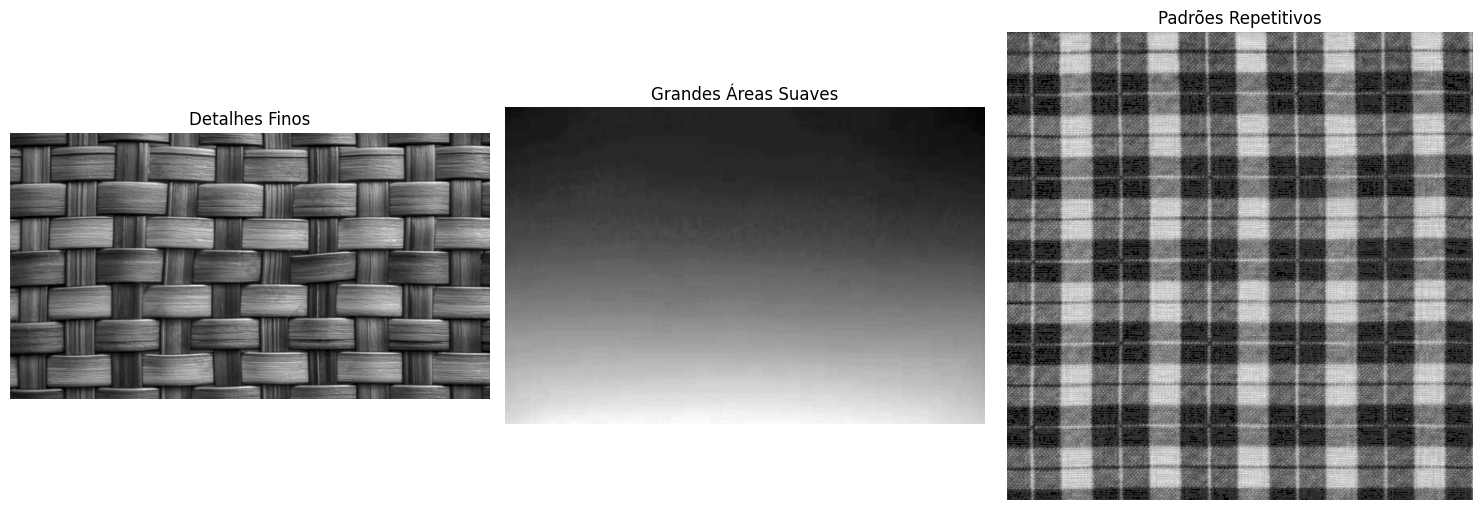

In [187]:

plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
plt.imshow(imagem_complexa, cmap='gray')
plt.title("Detalhes Finos")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(imagem_ceu_limpo, cmap='gray')
plt.title("Grandes Áreas Suaves")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(imagem_xadrez, cmap='gray')
plt.title("Padrões Repetitivos")
plt.axis('off')

plt.tight_layout()
plt.show()

Essa função aplica filtros de dominio de frequência utilizando a transformada de Fourier, ela vai filtrar as frequências que estão abaixo de um valor determinado e acima de outro valor determinado, filtrando as frequencias de passa-banda e direcional.

In [167]:
def filter_frequency_domain(image, filter_type="passband", **kwargs):
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.ones((rows, cols), np.float32)
    if filter_type == "passband":
        low_cut = kwargs.get("low_cut", 20)
        high_cut = kwargs.get("high_cut", 80)
        u = np.arange(rows)
        v = np.arange(cols)
        U, V = np.meshgrid(u, v, indexing='ij')
        D = np.sqrt((U - crow)**2 + (V - ccol)**2)
        mask = ((D >= low_cut) & (D <= high_cut)).astype(np.float32)
    elif filter_type == "directional":
        direction = kwargs.get("direction", "horizontal")
        band_width = kwargs.get("band_width", 10)
        if direction == "horizontal":
            mask[crow - band_width//2 : crow + band_width//2, :] = 0
        elif direction == "vertical":
            mask[:, ccol - band_width//2 : ccol + band_width//2] = 0
    fshift_filtered = fshift * mask
    magnitude_filtered = 20 * np.log(np.abs(fshift_filtered) + 1)
    f_ishift = np.fft.ifftshift(fshift_filtered)
    img_filtered = np.fft.ifft2(f_ishift)
    img_filtered = np.abs(img_filtered)
    return img_filtered, magnitude_filtered

Esse código carrega uma imagem e aplica dois tipos de filtros no domínio da frequência, o passa-banda e o direcional

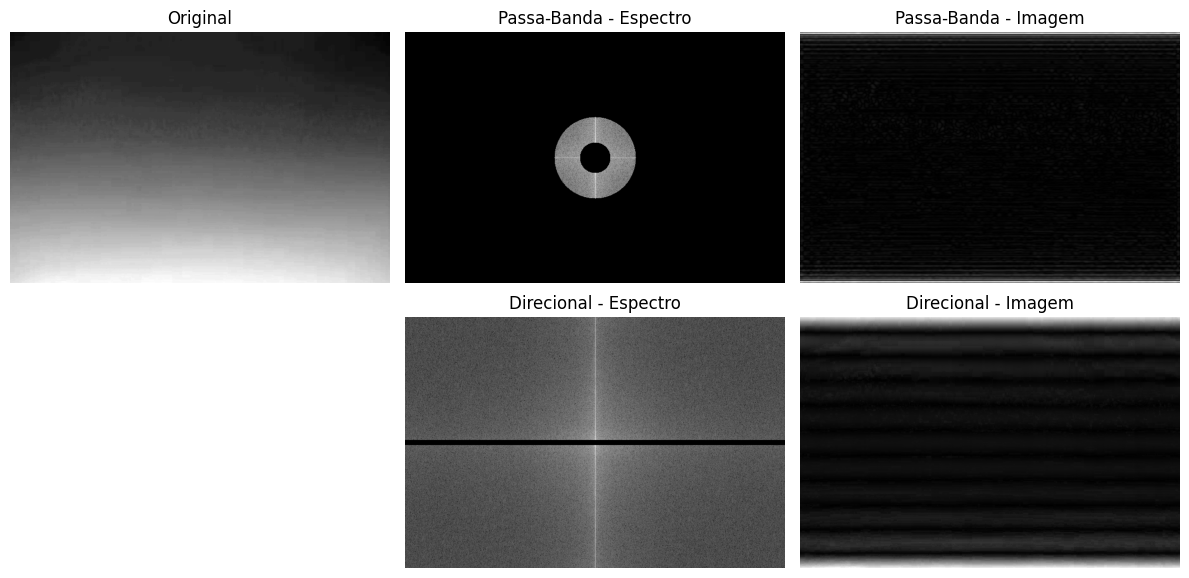

In [ ]:
img = cv2.imread('imagem_ceu_limpo.png', 0)
img_passband, mag_passband = filter_frequency_domain(img, filter_type="passband", low_cut=30, high_cut=80)
img_directional, mag_directional = filter_frequency_domain(img, filter_type="directional", direction="horizontal", band_width=10)

plt.figure(figsize=(12,6))
plt.subplot(2,3,1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')
plt.subplot(2,3,2)
plt.imshow(mag_passband, cmap='gray')
plt.title("Passa-Banda - Espectro")
plt.axis('off')
plt.subplot(2,3,3)
plt.imshow(img_passband, cmap='gray')
plt.title("Passa-Banda - Imagem")
plt.axis('off')
plt.subplot(2,3,5)
plt.imshow(mag_directional, cmap='gray')
plt.title("Direcional - Espectro")
plt.axis('off')
plt.subplot(2,3,6)
plt.imshow(img_directional, cmap='gray')
plt.title("Direcional - Imagem")
plt.axis('off')
plt.tight_layout()
plt.show()

1 - Imagem do Céu Limpo
Imagem Original: Apresenta um gradiente suave, com variação de tons de cinza sem padrões complexos.
Passa-Banda - Espectro: O espectro mostra um anel circular, indicando que apenas uma faixa específica de frequências foi mantida. Como a imagem original tem baixa frequência (degradê suave), grande parte da informação foi removida.
Passa-Banda - Imagem: A imagem resultante parece quase preta, pois a maioria das frequências da imagem original foi filtrada. Apenas pequenos detalhes de variações sutis de intensidade permanecem.
Direcional - Espectro: O espectro mostra uma linha horizontal e vertical, evidenciando que o filtro direcional atuou em certas direções.
Direcional - Imagem: A imagem resultante contém apenas alguns traços escuros, destacando padrões mínimos na direção do filtro. Como a imagem original não tem estrutura direcional clara, o efeito é sutil.

Esse código carrega uma imagem e aplica dois tipos de filtros no domínio da frequência, o passa-banda e o direcional

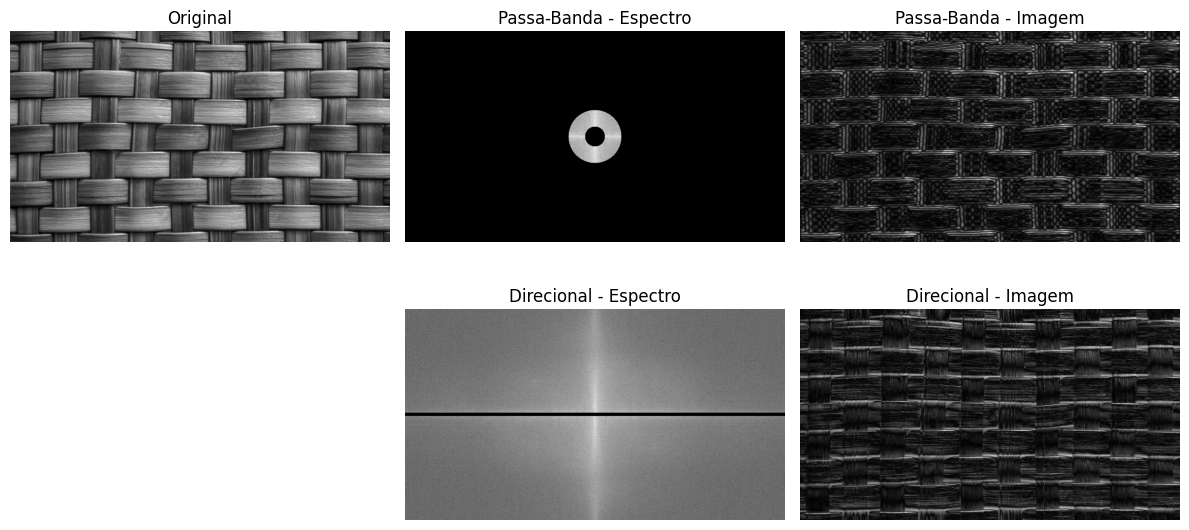

In [169]:
img = cv2.imread('imagem_textura_complexa.png', 0)
img_passband, mag_passband = filter_frequency_domain(img, filter_type="passband", low_cut=30, high_cut=80)
img_directional, mag_directional = filter_frequency_domain(img, filter_type="directional", direction="horizontal", band_width=10)

plt.figure(figsize=(12,6))
plt.subplot(2,3,1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')
plt.subplot(2,3,2)
plt.imshow(mag_passband, cmap='gray')
plt.title("Passa-Banda - Espectro")
plt.axis('off')
plt.subplot(2,3,3)
plt.imshow(img_passband, cmap='gray')
plt.title("Passa-Banda - Imagem")
plt.axis('off')
plt.subplot(2,3,5)
plt.imshow(mag_directional, cmap='gray')
plt.title("Direcional - Espectro")
plt.axis('off')
plt.subplot(2,3,6)
plt.imshow(img_directional, cmap='gray')
plt.title("Direcional - Imagem")
plt.axis('off')
plt.tight_layout()
plt.show()


2 - Imagem da Textura Complexa
Imagem Original: Exibe um padrão entrelaçado de textura, sugerindo uma distribuição de frequências mais equilibrada.
Passa-Banda - Espectro: O espectro mantém a forma circular, indicando a preservação de detalhes com periodicidade específica, sem permitir frequências muito baixas ou muito altas.
Passa-Banda - Imagem: A imagem resultante mantém boa parte da estrutura original, mas com alguns detalhes atenuados, pois apenas certas faixas de frequência foram preservadas.
Direcional - Espectro: Mostra uma estrutura mais linear no espectro, enfatizando a orientação predominante da textura (provavelmente horizontal ou vertical).
Direcional - Imagem: A textura aparece mais destacada em uma única direção, ressaltando linhas e padrões específicos que antes estavam misturados.

Esse código carrega uma imagem e aplica dois tipos de filtros no domínio da frequência, o passa-banda e o direcional

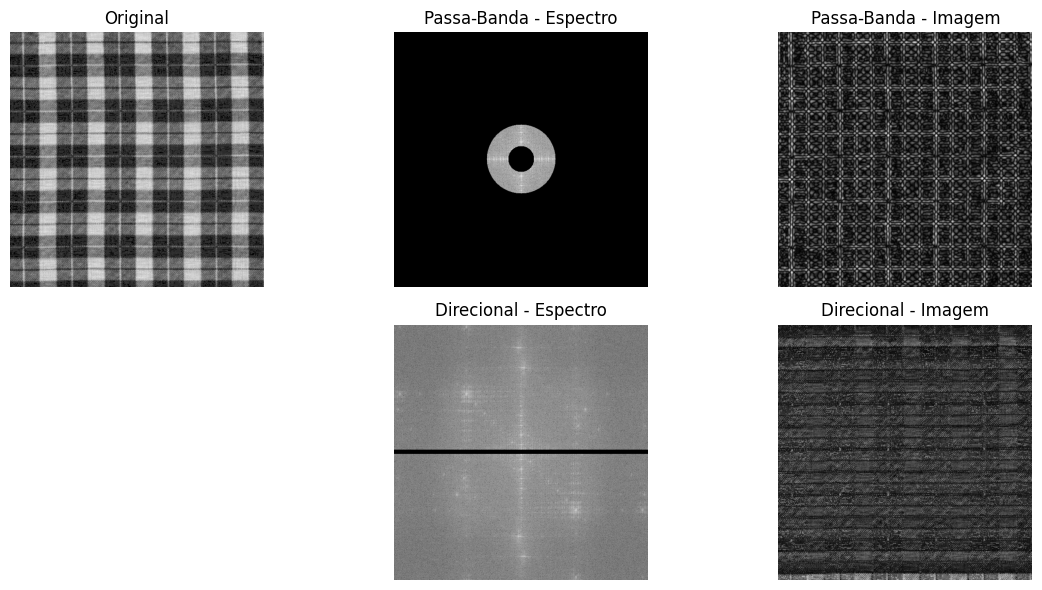

In [170]:
img = cv2.imread('imagem_xadrez.png', 0)
img_passband, mag_passband = filter_frequency_domain(img, filter_type="passband", low_cut=30, high_cut=80)
img_directional, mag_directional = filter_frequency_domain(img, filter_type="directional", direction="horizontal", band_width=10)

plt.figure(figsize=(12,6))
plt.subplot(2,3,1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')
plt.subplot(2,3,2)
plt.imshow(mag_passband, cmap='gray')
plt.title("Passa-Banda - Espectro")
plt.axis('off')
plt.subplot(2,3,3)
plt.imshow(img_passband, cmap='gray')
plt.title("Passa-Banda - Imagem")
plt.axis('off')
plt.subplot(2,3,5)
plt.imshow(mag_directional, cmap='gray')
plt.title("Direcional - Espectro")
plt.axis('off')
plt.subplot(2,3,6)
plt.imshow(img_directional, cmap='gray')
plt.title("Direcional - Imagem")
plt.axis('off')
plt.tight_layout()
plt.show()

3 - Imagem do Xadrez
Imagem Original: Contém um padrão quadriculado bem definido, formado por altas frequências devido às transições abruptas entre tons claros e escuros.
Passa-Banda - Espectro: O espectro contém um anel circular semelhante aos anteriores, mas com pontos mais visíveis, pois o padrão quadriculado gera componentes frequenciais bem definidos.
Passa-Banda - Imagem: A imagem resultante mantém o padrão quadriculado, mas com menos detalhes finos, pois apenas certas frequências foram preservadas.
Direcional - Espectro: O espectro mostra várias linhas e pontos distribuídos, indicando múltiplas direções predominantes da grade xadrez.
Direcional - Imagem: A imagem final mantém partes do padrão original, mas agora enfatizando apenas algumas direções da grade, dependendo do filtro aplicado.
Conclusão
O efeito dos filtros depende da complexidade e estrutura da imagem original.
A imagem do céu limpo perdeu quase toda a informação após a filtragem, pois tinha baixas frequências dominantes.
A textura complexa e o xadrez foram menos afetados, pois contêm padrões ricos em detalhes e frequências que o filtro ainda preserva.
O espectro revela quais elementos da imagem foram mantidos e eliminados, dependendo da configuração do filtro.

Esse código vai carregar a imagem com padrões repetitivos, após isso aplica a transformada de Fourier, depois ele vai calcular o espectro de magnitude
vai binarizar o espectro para destacar os padrões repetitivos e depois ele vai identificar os componentes conectados e vai mostrar os resultados

Número estimado de padrões repetitivos: 12337


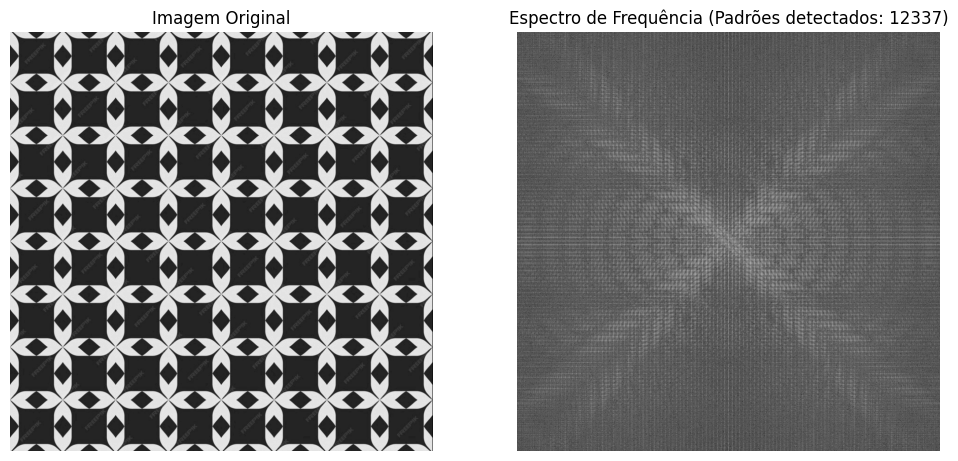

In [174]:
def detect_repetitive_patterns(image_path):
    # Carregar a imagem corretamente
    imagem_padroes_repetitivos = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Aplicar a Transformada de Fourier
    f_transform = np.fft.fft2(imagem_padroes_repetitivos)
    f_shift = np.fft.fftshift(f_transform)

    # Calcular o espectro de magnitude
    magnitude_spectrum = np.log(np.abs(f_shift) + 1)

    # Binarizar o espectro para destacar picos (padrões repetitivos)
    _, binary_spectrum = cv2.threshold(magnitude_spectrum, np.max(magnitude_spectrum) * 0.5, 255, cv2.THRESH_BINARY)

    # Identificar componentes conectados (agrupamentos de picos)
    structure = np.ones((3, 3), dtype=np.int32)
    labeled_array, num_features = label(binary_spectrum, structure)

    # Exibir os resultados
    plt.figure(figsize=(12, 6))

    # Exibir imagem original
    plt.subplot(1, 2, 1)
    plt.imshow(imagem_padroes_repetitivos, cmap="gray")
    plt.title("Imagem Original")
    plt.axis("off")

    # Exibir espectro de frequência
    plt.subplot(1, 2, 2)
    plt.imshow(magnitude_spectrum, cmap="gray")
    plt.title(f"Espectro de Frequência (Padrões detectados: {num_features})")
    plt.axis("off")


    print(f"Número estimado de padrões repetitivos: {num_features}")

# Testando com a imagem carregada
detect_repetitive_patterns("imagem_padroes_repetitivos.png")
